In [1]:
import os
import numpy as np
import pandas as pd
from utilities import cal_score

In [2]:
stack_idx = '17'
models = '1-31'
use_test_kfold = set([2, 7, 8, 12, 13])

### Read CV predictions and test

In [3]:
def parse_models(exp):
    exp_split = exp.split(',')
    idx_models = []
    for e in exp_split:
        if '-' in e:
            n0, n1 = e.split('-')
            idx_models.extend(list(range(int(n0), int(n1)+1, 1)))
        else:
            idx_models.append(int(e))
    return idx_models

In [4]:
idx_models = parse_models(models)
print(idx_models)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [5]:
files_in_output = [f for f in os.listdir('output/') if os.path.isfile('output/'+f)]
files_cv = {idx: [f for f in files_in_output 
                  if f.startswith('model-%02d-' % idx) and f.endswith('cv.csv')][0] 
            for idx in idx_models}
files_test_one = {idx: [f for f in files_in_output 
                        if f.startswith('model-%02d-' % idx) and f.endswith('test-one.csv')][0]
                  for idx in idx_models}
files_test_kf = {idx: [f for f in files_in_output 
                       if f.startswith('model-%02d-' % idx) and f.endswith('test-kfold.csv')][0]
                 for idx in idx_models}

In [6]:
for k in files_cv: 
    print('%2d'%k, files_cv[k])
    print('%2d'%k, files_test_kf[k])
    print('%2d'%k, files_test_one[k])

 1 model-01-lgb-cv.csv
 1 model-01-lgb-test-kfold.csv
 1 model-01-lgb-test-one.csv
 2 model-02-keras-search-cv.csv
 2 model-02-keras-search-test-kfold.csv
 2 model-02-keras-search-test-one.csv
 3 model-03-lgb-feats-selection-cv.csv
 3 model-03-lgb-feats-selection-test-kfold.csv
 3 model-03-lgb-feats-selection-test-one.csv
 4 model-04-lgb-PCA-cv.csv
 4 model-04-lgb-PCA-test-kfold.csv
 4 model-04-lgb-PCA-test-one.csv
 5 model-05-lgb-wo-per-area-cv.csv
 5 model-05-lgb-wo-per-area-test-kfold.csv
 5 model-05-lgb-wo-per-area-test-one.csv
 6 model-06-lgb-lr0.001-cv.csv
 6 model-06-lgb-lr0.001-test-kfold.csv
 6 model-06-lgb-lr0.001-test-one.csv
 7 model-07-keras-embedding-cv.csv
 7 model-07-keras-embedding-test-kfold.csv
 7 model-07-keras-embedding-test-one.csv
 8 model-08-keras-search-long-cv.csv
 8 model-08-keras-search-long-test-kfold.csv
 8 model-08-keras-search-long-test-one.csv
 9 model-09-lgb-feats-selection-75-cv.csv
 9 model-09-lgb-feats-selection-75-test-kfold.csv
 9 model-09-lgb-fea

#### Load area

In [7]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [8]:
cv = df_train[['building_id', 'building_area', 'total_price']]
test = df_test[['building_id', 'building_area']]

print('CV predictions:')
for i, idx_model in enumerate(idx_models):
    f = files_cv[idx_model]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)
    
    cv = pd.merge(cv, df[['building_id', 'total_price_predict']], on='building_id')
    
    cv = cv.rename(columns = {'total_price_predict': 'pred_{}'.format(idx_model)})
    cv[f'log_pred_{idx_model}'] = np.log1p(cv[f'pred_{idx_model}'])
    cv[f'log_parea_pred_{idx_model}'] = np.log1p( cv[f'pred_{idx_model}'] / cv['building_area'] )

cv['log_total_price'] = np.log1p(cv['total_price'])
cv['log_parea_total_price'] = np.log1p( cv['total_price'] / cv['building_area'] )

print('Test predictions:')
for i, idx in enumerate(idx_models):
    f = files_test_kf[idx] if idx in use_test_kfold else files_test_one[idx]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)

    test = pd.merge(test, df[['building_id','total_price']], on='building_id')
        
    test = test.rename(columns = {'total_price': 'pred_{}'.format(idx)})
    test[f'log_pred_{idx}'] = np.log1p(test[f'pred_{idx}'])
    test[f'log_parea_pred_{idx}'] = np.log1p( test[f'pred_{idx}'] / test['building_area'] )

CV predictions:
No. 0 file: model-01-lgb-cv.csv
No. 1 file: model-02-keras-search-cv.csv
No. 2 file: model-03-lgb-feats-selection-cv.csv
No. 3 file: model-04-lgb-PCA-cv.csv
No. 4 file: model-05-lgb-wo-per-area-cv.csv
No. 5 file: model-06-lgb-lr0.001-cv.csv
No. 6 file: model-07-keras-embedding-cv.csv
No. 7 file: model-08-keras-search-long-cv.csv
No. 8 file: model-09-lgb-feats-selection-75-cv.csv
No. 9 file: model-10-lgb-feats-selection-75-lr-0.001-cv.csv
No. 10 file: model-11-rf-cv.csv
No. 11 file: model-12-predict-keras-search-prelu-cv.csv
No. 12 file: model-13-predict-keras-he_uni-cv.csv
No. 13 file: model-14-lgb-feats-selection-75-lr-0.001-rand-cv.csv
No. 14 file: model-15-lgb-feats-selection-75-lr-0.001-rand323-cv.csv
No. 15 file: model-16-lgb-feats-selection-68-lr-0.001-mix5-cv.csv
No. 16 file: model-17-lgb-feats-selection-70-lr-0.001-mix5-cv.csv
No. 17 file: model-18-lgb-feats-selection-70-lr-0.001-p5-cv.csv
No. 18 file: model-19-lgb-search-bins-lr-0.0005-cv.csv
No. 19 file: model

In [9]:
cv.head()

,building_id,building_area,total_price,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,...,log_pred_29,log_parea_pred_29,pred_30,log_pred_30,log_parea_pred_30,pred_31,log_pred_31,log_parea_pred_31,log_total_price,log_parea_total_price
0,e3mMIMR3JJqCaXz1,3.418175,6.476038e+05,6.331552e+05,13.358472,12.129369,717209.94,13.483125,12.254022,6.656891e+05,...,13.349368,12.120265,6.687262e+05,13.413132,12.184028,6.789011e+05,13.428232,12.199129,13.381036,12.151933
1,LgwzgklNvy4QCtq5,4.041309,3.321452e+06,3.064324e+06,14.935338,13.538770,2899842.20,14.880167,13.483600,3.079196e+06,...,14.961478,13.564910,3.180461e+06,14.972537,13.575969,2.996046e+06,14.912804,13.516237,15.015913,13.619345
2,ucIR2NLLsC3T650L,5.584279,9.570885e+06,9.827776e+06,16.100723,14.380769,9766813.00,16.094501,14.374546,9.814852e+06,...,16.094058,14.374103,9.739343e+06,16.091684,14.371729,9.840726e+06,16.102040,14.382085,16.074236,14.354282
3,jre1pJhcQj91Kdky,13.563031,1.421501e+07,1.255350e+07,16.345510,13.738164,12699800.00,16.357097,13.749750,1.255981e+07,...,16.351248,13.743901,1.242492e+07,16.335215,13.727868,1.246321e+07,16.338292,13.730945,16.469809,13.862462
4,rQpYpY9nRG7X5mmr,4.688108,7.627120e+05,1.215194e+06,14.010415,12.465389,2012610.50,14.514944,12.969916,1.128419e+06,...,13.936413,12.391388,1.227169e+06,14.020221,12.475195,1.159105e+06,13.963160,12.418134,13.544637,11.999613


In [10]:
test.head()

,building_id,building_area,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,log_pred_3,...,log_parea_pred_28,pred_29,log_pred_29,log_parea_pred_29,pred_30,log_pred_30,log_parea_pred_30,pred_31,log_pred_31,log_parea_pred_31
0,X5gsdTWGS3W7JJQB,3.418175,1.526912e+07,16.541343,15.312236,12470072.0,16.338842,15.109735,1.531685e+07,16.544464,...,15.284537,1.458851e+07,16.495745,15.266638,1.341823e+07,16.412125,15.183018,1.235658e+07,16.329699,15.100592
1,BTshNOJyKHnT2YIT,7.726227,3.924241e+06,15.182684,13.138065,3916552.2,15.180723,13.136104,3.977095e+06,15.196062,...,13.138282,3.930381e+06,15.184247,13.139628,3.931973e+06,15.184652,13.140033,3.933268e+06,15.184982,13.140363
2,dhdymr0lV8N5kZOT,12.170581,1.096127e+07,16.209879,13.710858,11912735.0,16.293119,13.794098,1.084967e+07,16.199646,...,13.683307,1.053625e+07,16.170332,13.671312,1.221239e+07,16.317962,13.818941,1.039900e+07,16.157220,13.658199
3,VEwyGGMcD56w5BOc,2.252256,6.155550e+06,15.632865,14.820933,5940670.0,15.597333,14.785400,6.015238e+06,15.609807,...,14.799625,5.922934e+06,15.594343,14.782410,5.957837e+06,15.600218,14.788286,5.944207e+06,15.597928,14.785996
4,wmUeMoJZfsqaSX9b,5.813985,1.062995e+06,13.876602,12.116340,1088488.1,13.900301,12.140039,1.027248e+06,13.842395,...,12.131217,1.092658e+06,13.904125,12.143863,1.110080e+06,13.919943,12.159682,1.140621e+06,13.947084,12.186822


### Check models scores

In [11]:
scores_models = {idx_model: cal_score(cv['total_price'], cv[f'pred_{idx_model}'])
                 for idx_model in idx_models}

In [12]:
for i, (idx_model, s) in enumerate(scores_models.items()):
    print('%2d'%i, 'model-%02d'%idx_model, '%.6f'%s)

 0 model-01 5870.873059
 1 model-02 5400.852164
 2 model-03 5877.873452
 3 model-04 5713.867808
 4 model-05 5724.869598
 5 model-06 5886.873769
 6 model-07 5171.836449
 7 model-08 5514.858826
 8 model-09 5872.873118
 9 model-10 5897.873845
10 model-11 5075.838018
11 model-12 5486.856963
12 model-13 5506.858055
13 model-14 5908.873901
14 model-15 5900.873836
15 model-16 5907.874126
16 model-17 5905.874165
17 model-18 5908.874297
18 model-19 5911.874156
19 model-20 5908.874040
20 model-21 5758.870702
21 model-22 5752.870671
22 model-23 5852.871357
23 model-24 5866.873835
24 model-25 5908.874238
25 model-26 5918.873998
26 model-27 5892.873194
27 model-28 5901.874202
28 model-29 5884.873848
29 model-30 5864.872101
30 model-31 5783.868923


### Search subset model mean 

In [13]:
def get_prefix(is_per_area, is_log):
    if is_log:
        if is_per_area:
            col_prefix = 'log_parea_pred'
        else:
            col_prefix = 'log_pred'
    else:
        if is_per_area:
            raise 'Not support'
        else:
            col_prefix = 'pred'
    return col_prefix

In [14]:
def mean_subset(df, idx_models, is_per_area, is_log):
    col_prefix = get_prefix(is_per_area, is_log)
    cols_models = [col_prefix+'_'+str(i) for i in idx_models]
    return df[cols_models].mean(axis=1)

In [15]:
def predict_mean_subset(df, idx_models, is_per_area, is_log):
    y_pred = mean_subset(df, idx_models, is_per_area, is_log)
    y_pred_final = y_pred
    if is_log:
        y_pred_final = np.expm1(y_pred_final)
    if is_per_area:
        y_pred_final = y_pred_final * df['building_area']
    return y_pred_final

In [16]:
def search_mean_subset(cv, idx_models, is_per_area, is_log):
    idx_models_subset = idx_models.copy()
    result_list = []
    y_pred_cv = predict_mean_subset(cv, idx_models_subset, is_per_area=is_per_area, is_log=is_log)
    score = cal_score(cv['total_price'], y_pred_cv)
    print('%.6f'%score, idx_models_subset)
    result_list.append([score, idx_models_subset])
    while len(idx_models_subset) > 1:
        print('N models remained:', len(idx_models_subset))
        result_list_subset = []
        for i_rm in range(len(idx_models_subset)):
            idx_models_subset_next = idx_models_subset[:i_rm]+idx_models_subset[i_rm+1:]
            y_pred_cv = predict_mean_subset(cv, idx_models_subset_next, is_per_area=is_per_area, is_log=is_log)
            score = cal_score(cv['total_price'], y_pred_cv)
            print('%.6f'%score, idx_models_subset_next)
            result_list_subset.append([score, idx_models_subset_next])
        result_list.extend(result_list_subset)
        result_list_subset.sort(key=lambda x: x[0], reverse=True)
        print('Best of the round:', result_list_subset[0][0], result_list_subset[0][1])
        idx_models_subset = result_list_subset[0][1]
        print()
    result_list.sort(key=lambda x: x[0], reverse=True)
    return result_list

#### Log mean

In [17]:
result_list_log = search_mean_subset(cv, idx_models, is_per_area=False, is_log=True)

5945.875284 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
N models remained: 31
5946.875293 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5946.875233 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5946.875279 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5943.875285 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5946.875231 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5946.875287 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5944.875232 [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,

5959.875586 [1, 2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5953.875484 [1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5956.875590 [1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5958.875588 [1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5950.875512 [1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5956.875510 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5956.875585 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5958.875588 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5957.875581 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 17, 

5955.875614 [1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5954.875583 [1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
5952.875582 [1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Best of the round: 5960.875618883405 [1, 2, 3, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

N models remained: 26
5960.875644 [2, 3, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5962.875552 [1, 3, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5957.875628 [1, 2, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5957.875579 [1, 2, 3, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5956.875545 [1, 2, 3, 5, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22

5960.875601 [1, 3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31]
5961.875594 [1, 3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5963.875560 [1, 3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
5957.875555 [1, 3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Best of the round: 5964.875604314114 [1, 3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

N models remained: 23
5961.875638 [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5961.875619 [1, 5, 8, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5962.875573 [1, 3, 8, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5956.875482 [1, 3, 5, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5953.875516 [1, 3, 5, 8, 13, 14, 15, 16, 17, 18, 20, 21

5967.875527 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 25, 26, 27, 28, 29, 31]
5964.875592 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 31]
5965.875605 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 27, 28, 29, 31]
5963.875584 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 28, 29, 31]
5966.875596 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 29, 31]
5966.875590 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 31]
5956.875545 [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29]
Best of the round: 5967.875615290288 [3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]

N models remained: 19
5964.875623 [5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]
5959.875550 [3, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]
5962.875510 [3, 5, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]
5962.875553 [3, 5, 8, 

5956.875544 [8, 13, 16, 17, 18, 22, 23, 25, 26, 27, 28, 31]
5953.875335 [3, 13, 16, 17, 18, 22, 23, 25, 26, 27, 28, 31]
5948.875391 [3, 8, 16, 17, 18, 22, 23, 25, 26, 27, 28, 31]
5957.875560 [3, 8, 13, 17, 18, 22, 23, 25, 26, 27, 28, 31]
5958.875558 [3, 8, 13, 16, 18, 22, 23, 25, 26, 27, 28, 31]
5960.875544 [3, 8, 13, 16, 17, 22, 23, 25, 26, 27, 28, 31]
5953.875392 [3, 8, 13, 16, 17, 18, 23, 25, 26, 27, 28, 31]
5961.875492 [3, 8, 13, 16, 17, 18, 22, 25, 26, 27, 28, 31]
5958.875546 [3, 8, 13, 16, 17, 18, 22, 23, 26, 27, 28, 31]
5956.875570 [3, 8, 13, 16, 17, 18, 22, 23, 25, 27, 28, 31]
5958.875540 [3, 8, 13, 16, 17, 18, 22, 23, 25, 26, 28, 31]
5958.875552 [3, 8, 13, 16, 17, 18, 22, 23, 25, 26, 27, 31]
5956.875499 [3, 8, 13, 16, 17, 18, 22, 23, 25, 26, 27, 28]
Best of the round: 5961.875491926495 [3, 8, 13, 16, 17, 18, 22, 25, 26, 27, 28, 31]

N models remained: 12
5962.875489 [8, 13, 16, 17, 18, 22, 25, 26, 27, 28, 31]
5953.875291 [3, 13, 16, 17, 18, 22, 25, 26, 27, 28, 31]
5951.875353 

In [18]:
display(result_list_log[:10])

[[5967.875615290288,
  [3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]],
 [5967.875527082438,
  [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 25, 26, 27, 28, 29, 31]],
 [5966.87560036853,
  [1, 3, 5, 8, 12, 13, 15, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]],
 [5966.875596263957,
  [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 29, 31]],
 [5966.875589783241,
  [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 31]],
 [5966.8755811602705,
  [1,
   3,
   5,
   8,
   12,
   13,
   15,
   16,
   17,
   18,
   20,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   31]],
 [5966.875579647046,
  [1,
   3,
   5,
   8,
   12,
   13,
   15,
   16,
   17,
   18,
   20,
   21,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   31]],
 [5965.875604821865,
  [1, 3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 27, 28, 29, 31]],
 [5965.875591670916,
  [1, 3, 5, 8, 12, 13, 15, 16, 17, 20, 22, 23, 24, 25, 26, 27, 28, 29, 3

In [19]:
best_models_subset_log = result_list_log[0][1]
print('Best score and subset:', '%.6f'%result_list_log[0][0], best_models_subset_log)
for idx_model in best_models_subset_log:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5967.875615 [3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]
model-03 5877.873452
model-05 5724.869598
model-08 5514.858826
model-12 5486.856963
model-13 5506.858055
model-15 5900.873836
model-16 5907.874126
model-17 5905.874165
model-18 5908.874297
model-20 5908.874040
model-22 5752.870671
model-23 5852.871357
model-24 5866.873835
model-25 5908.874238
model-26 5918.873998
model-27 5892.873194
model-28 5901.874202
model-29 5884.873848
model-31 5783.868923


In [38]:
len(best_models_subset_log)

19

In [20]:
# per area or not for the mean ensemble model are the same
#result_list_per_area_log = search_mean_subset(cv, idx_models, is_per_area=True, is_log=True)
#result_list_per_area_log

#### Linear mean

In [21]:
result_list_none = search_mean_subset(cv, idx_models, is_per_area=False, is_log=False)

5942.874417 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
N models remained: 31
5942.874401 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5945.874434 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5943.874387 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5941.874406 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5940.874349 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5941.874394 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
5948.874718 [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,

5949.874727 [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5952.874770 [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5951.875127 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5948.874767 [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5953.874775 [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5952.874770 [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5952.874802 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5945.874812 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
5952.874768 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18,

5951.874759 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31]
5953.874778 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31]
5951.874747 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31]
5955.874789 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31]
5956.874799 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31]
5952.874784 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31]
5956.874791 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31]
5950.874764 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31]
5948.874763 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30]
Best of th

5952.874650 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 23, 24, 25, 26, 27, 28, 30, 31]
5953.874689 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31]
5953.874651 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 25, 26, 27, 28, 30, 31]
5954.874695 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 26, 27, 28, 30, 31]
5954.874706 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 27, 28, 30, 31]
5955.874690 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 28, 30, 31]
5953.874699 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 30, 31]
5952.874673 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 31]
5943.874671 [1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 30]
Best of the round: 5956.874711558499 [1, 4, 5, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 30

5958.874573 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 21, 23, 24, 25, 26, 27, 28, 30, 31]
5953.874515 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 23, 24, 25, 26, 27, 28, 30, 31]
5959.874565 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 24, 25, 26, 27, 28, 30, 31]
5956.874511 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 25, 26, 27, 28, 30, 31]
5956.874559 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 24, 26, 27, 28, 30, 31]
5955.874573 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 24, 25, 27, 28, 30, 31]
5958.874555 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 24, 25, 26, 28, 30, 31]
5956.874562 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 24, 25, 26, 27, 30, 31]
5957.874544 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 31]
5958.874545 [4, 5, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 30]
Best of the round: 5960.874576957068 [4, 5, 7, 8, 10, 12, 13, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31]

N models remained: 19
5954.874546 [5, 7

5957.875265 [5, 8, 12, 16, 20, 21, 23, 24, 26, 27, 28, 30, 31]
5956.875285 [5, 8, 12, 16, 20, 21, 23, 24, 25, 27, 28, 30, 31]
5957.875254 [5, 8, 12, 16, 20, 21, 23, 24, 25, 26, 28, 30, 31]
5957.875269 [5, 8, 12, 16, 20, 21, 23, 24, 25, 26, 27, 30, 31]
5950.875253 [5, 8, 12, 16, 20, 21, 23, 24, 25, 26, 27, 28, 31]
5951.875240 [5, 8, 12, 16, 20, 21, 23, 24, 25, 26, 27, 28, 30]
Best of the round: 5961.875214413243 [5, 8, 12, 16, 20, 23, 24, 25, 26, 27, 28, 30, 31]

N models remained: 13
5956.875061 [8, 12, 16, 20, 23, 24, 25, 26, 27, 28, 30, 31]
5952.875142 [5, 12, 16, 20, 23, 24, 25, 26, 27, 28, 30, 31]
5949.875217 [5, 8, 16, 20, 23, 24, 25, 26, 27, 28, 30, 31]
5959.875195 [5, 8, 12, 20, 23, 24, 25, 26, 27, 28, 30, 31]
5958.875216 [5, 8, 12, 16, 23, 24, 25, 26, 27, 28, 30, 31]
5955.875215 [5, 8, 12, 16, 20, 24, 25, 26, 27, 28, 30, 31]
5957.875111 [5, 8, 12, 16, 20, 23, 25, 26, 27, 28, 30, 31]
5958.875194 [5, 8, 12, 16, 20, 23, 24, 26, 27, 28, 30, 31]
5958.875217 [5, 8, 12, 16, 20, 23, 24

In [22]:
display(result_list_none[:10])

[[5963.875180034078, [5, 12, 16, 23, 24, 25, 27, 31]],
 [5962.875183823658,
  [5, 8, 12, 13, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31]],
 [5962.875179348571, [5, 8, 12, 16, 23, 24, 25, 26, 27, 30, 31]],
 [5962.8751488096605,
  [5, 8, 12, 13, 16, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31]],
 [5962.875147877938, [5, 12, 16, 23, 24, 26, 27, 31]],
 [5962.875090574442,
  [4, 5, 8, 12, 13, 16, 17, 20, 23, 24, 25, 26, 27, 28, 30, 31]],
 [5962.87502288073, [5, 12, 16, 23, 25, 26, 27, 31]],
 [5962.874516179072,
  [4, 5, 7, 8, 12, 13, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31]],
 [5961.875214413243, [5, 8, 12, 16, 20, 23, 24, 25, 26, 27, 28, 30, 31]],
 [5961.875173754252, [5, 12, 16, 23, 24, 25, 26, 27, 31]]]

In [23]:
best_models_subset_none = result_list_none[0][1]
print('Best score and subset:', '%.6f'%result_list_none[0][0], best_models_subset_none)
for idx_model in best_models_subset_none:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5963.875180 [5, 12, 16, 23, 24, 25, 27, 31]
model-05 5724.869598
model-12 5486.856963
model-16 5907.874126
model-23 5852.871357
model-24 5866.873835
model-25 5908.874238
model-27 5892.873194
model-31 5783.868923


### Compute submission for mean log

In [24]:
import matplotlib.pyplot as plt

In [25]:
print('Predict for mean log with', best_models_subset_log)
test['total_price'] = predict_mean_subset(test, best_models_subset_log, is_per_area=False, is_log=True)

Predict for mean log with [3, 5, 8, 12, 13, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


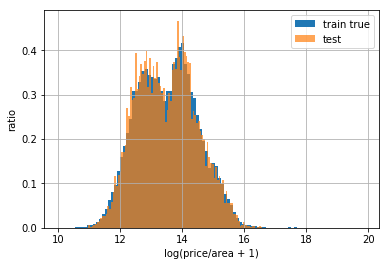

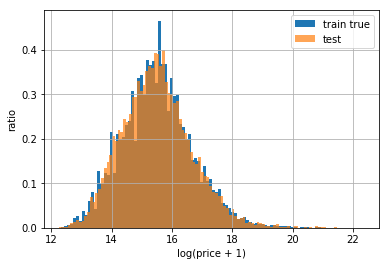

In [26]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(np.log1p(cv['building_area']), bins=100, label='train', normed=True)
plt.hist(np.log1p(test['building_area']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(building_area + 1)'); plt.ylabel('ratio'); plt.yscale('log')
plt.legend(); plt.grid(); plt.show()

In [27]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.375903e+07
1,BTshNOJyKHnT2YIT,3.921847e+06
2,dhdymr0lV8N5kZOT,1.101022e+07
3,VEwyGGMcD56w5BOc,5.974026e+06
4,wmUeMoJZfsqaSX9b,1.076338e+06
9995,UEeCDaAJzPwdKKKA,1.230130e+06
9996,i0fgbPaQsDWs7Q87,4.730020e+07
9997,YunNwAhcqkf6YclI,1.102865e+06
9998,A2NotxtRY9MYoWMl,2.985457e+06
9999,kKvgBXiA50gRmQhP,3.120394e+06


shape = (10000, 2)


In [28]:
output_filename = 'output/stack_meanlog_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_meanlog_17_1-31.csv


In [29]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [30]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.375903e+07
1,BTshNOJyKHnT2YIT,3.921847e+06
2,dhdymr0lV8N5kZOT,1.101022e+07
3,VEwyGGMcD56w5BOc,5.974026e+06
4,wmUeMoJZfsqaSX9b,1.076338e+06
9995,UEeCDaAJzPwdKKKA,1.230130e+06
9996,i0fgbPaQsDWs7Q87,4.730020e+07
9997,YunNwAhcqkf6YclI,1.102865e+06
9998,A2NotxtRY9MYoWMl,2.985457e+06
9999,kKvgBXiA50gRmQhP,3.120394e+06


shape = (10000, 2)


### Compute submission for linear mean

In [31]:
import matplotlib.pyplot as plt

In [32]:
print('Predict for liear mean with', best_models_subset_none)
test['total_price'] = predict_mean_subset(test, best_models_subset_none, is_per_area=False, is_log=False)

Predict for liear mean with [5, 12, 16, 23, 24, 25, 27, 31]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


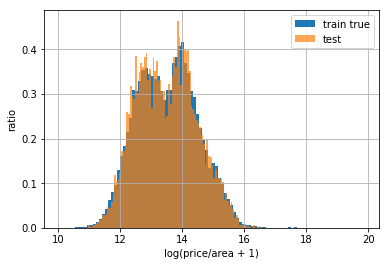

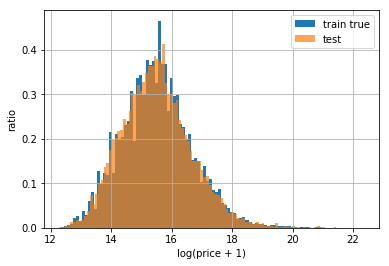

In [33]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

In [34]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.353345e+07
1,BTshNOJyKHnT2YIT,3.909591e+06
2,dhdymr0lV8N5kZOT,1.113076e+07
3,VEwyGGMcD56w5BOc,5.941879e+06
4,wmUeMoJZfsqaSX9b,1.085826e+06
9995,UEeCDaAJzPwdKKKA,1.231761e+06
9996,i0fgbPaQsDWs7Q87,4.742257e+07
9997,YunNwAhcqkf6YclI,1.106934e+06
9998,A2NotxtRY9MYoWMl,2.985814e+06
9999,kKvgBXiA50gRmQhP,3.107474e+06


shape = (10000, 2)


In [35]:
output_filename = 'output/stack_mean_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_mean_17_1-31.csv


In [36]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [37]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.353345e+07
1,BTshNOJyKHnT2YIT,3.909591e+06
2,dhdymr0lV8N5kZOT,1.113076e+07
3,VEwyGGMcD56w5BOc,5.941879e+06
4,wmUeMoJZfsqaSX9b,1.085826e+06
9995,UEeCDaAJzPwdKKKA,1.231761e+06
9996,i0fgbPaQsDWs7Q87,4.742257e+07
9997,YunNwAhcqkf6YclI,1.106934e+06
9998,A2NotxtRY9MYoWMl,2.985814e+06
9999,kKvgBXiA50gRmQhP,3.107474e+06


shape = (10000, 2)
